### Bài toán 1:
Thực hiện các nhiệm vụ trong bài toán 1 để làm quen với việc xây dựng mô hình dựa vào 
thuật toán phân cụm K-Means trên tập dữ liệu Mall-Customer. Dữ liệu lấy tại 
https://www.kaggle.com/code/fadymamdouh01/mall-customer-segmentation-data-clustering.

**Nhiệm vụ 1:** Thực hiện giải thuật K - Means để phân cụm dữ liệu khách.

1. Import các gói thư viện và nạp dữ liệu vào notebook

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
 
df = pd.read_csv('Dataset/Mall_Customers.csv') 
# Transform Gender to 0's and 1's 
df['Gender'] = df['Gender'].map({'Male': 1, "Female": 0}) 
df.info() 
# Data for cluster 
X = df.iloc[:, -4:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


2. Xây dựng mô hình K - Means

In [3]:
# We will create K-Means Models `iteratively between k values of 3 to 10` and  at  each  step,  capture  the  `Silhoutte  Score`  and  `Inertia  (Sum  of Squared Distances)` 
km_inertias, km_scores = [], [] 
for k in range(3, 10): 
    km = KMeans(n_clusters=k).fit(X) 
    km_inertias.append(km.inertia_) 
    km_scores.append(silhouette_score(X, km.labels_)) 
    print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}, Silhoutte Score = {silhouette_score(X, km.labels_)}") 
km_inertias 

Processing K-Means with k = 3, Intertia = 143391.5923603568, Silhoutte Score = 0.383798873822341
Processing K-Means with k = 4, Intertia = 104422.83498539748, Silhoutte Score = 0.40553486600451777
Processing K-Means with k = 5, Intertia = 79332.18630839838, Silhoutte Score = 0.4265550224814249
Processing K-Means with k = 6, Intertia = 68638.23617549721, Silhoutte Score = 0.42122942019093673
Processing K-Means with k = 7, Intertia = 51165.18423710792, Silhoutte Score = 0.43946743327036053
Processing K-Means with k = 8, Intertia = 51244.37206439931, Silhoutte Score = 0.39810294465815316
Processing K-Means with k = 9, Intertia = 45821.938736847136, Silhoutte Score = 0.3779024171031242


[143391.5923603568,
 104422.83498539748,
 79332.18630839838,
 68638.23617549721,
 51165.18423710792,
 51244.37206439931,
 45821.938736847136]

3. Tìm số cụm tối ưu cho mô hình K - Means bằng phương pháp Elbow

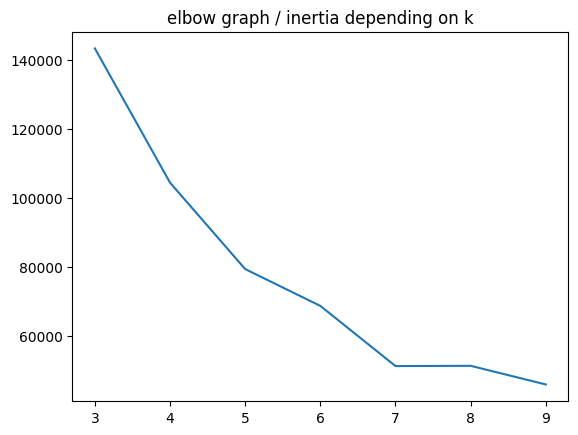

In [4]:
# sns.lineplot(range(3, 10), km_inertias) PHUOCNT 
sns.lineplot(x=range(3, 10), y=km_inertias) 
plt.title('elbow graph / inertia depending on k') 
plt.show() 

4. Tìm số cụm tối ưu bằng phương pháp Silhoutte

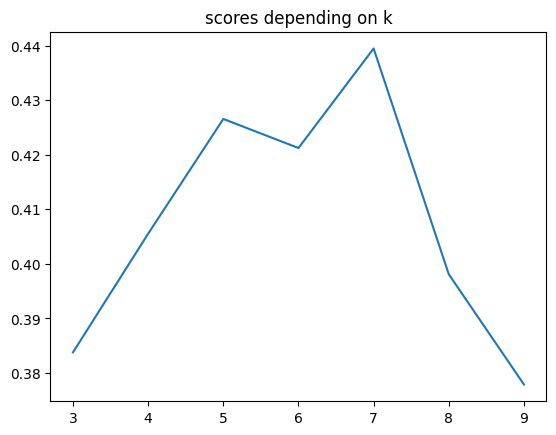

In [5]:
sns.lineplot(x=range(3, 10), y=km_scores) 
plt.title('scores depending on k') 
plt.show()

5. Gán nhãn cho các mẫu dữ liệu dựa vào mô hình K - Means với số cụm là 6

In [6]:
km = KMeans(n_clusters=6).fit(X) 
#Assign the Cluster Labels to the Data 
X['Label'] = km.labels_ 
#Info for each cluster 
for k in range(6): 
    print(f'Cluster nb : {k}') 
    print(X[X.Label == k].describe().iloc[:, 1:-1]) 
    print('\n\n')

Cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
std     3.728650           16.312485                9.364489
min    27.000000           69.000000               63.000000
25%    30.000000           75.500000               74.500000
50%    32.000000           79.000000               83.000000
75%    35.500000           95.000000               90.000000
max    40.000000          137.000000               97.000000



Cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  51.000000           51.000000               51.000000
mean   53.823529           54.725490               48.980392
std    10.220970            8.321246                6.211248
min    32.000000           38.000000               35.000000
25%    47.500000           48.000000               43.500000
50%    51.000000           54.000000               4